# Model Tuning - Random Forest

In [3]:
pwd

'/Users/kelly/metis_v3/Project_3'

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score
from sklearn import tree

In [5]:
import pickle
with open('beer_df_formodel.pickle','rb') as read_file:
    beer_df = pickle.load(read_file)
beer_df.head(1)

,beerid,name,style,styleid,size,og,fg,abv,ibu,color,...,lager,stout,porter,saison,kolsch,ale,apa,wheat,pilsner,style_num
0,1,Vanilla Cream Ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,...,0,0,0,0,0,7,0,0,0,7


In [6]:
X = beer_df.iloc[:,4:-13].drop(columns = 'brewmethod')
y = beer_df.style_num
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4444)

# Random Forest

In [51]:
rf_model = RandomForestClassifier(random_state = 4444)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=4444, verbose=0,
            warm_start=False)

In [53]:
rf_model.score(X_test, y_test)

0.5909415971394517

In [54]:
X.columns

Index(['size', 'og', 'fg', 'abv', 'ibu', 'color', 'boilsize', 'boiltime',
       'boilgravity', 'efficiency', 'allgrain', 'biab', 'partialmash',
       'extract'],
      dtype='object')

In [55]:
style_list = ['ipa', 'lager', 'stout', 'porter', 'saison', 'kolsch', 'ale', 'apa', 'wheat', 'pilsner']

**Adjust Number of Features**

In [16]:
X.head()

,size,og,fg,abv,ibu,color,boilsize,boiltime,boilgravity,efficiency,allgrain,biab,partialmash,extract
0,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,1,0,0,0
2,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,1,0,0,0
3,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70,1.047,79.0,1,0,0,0
4,20.82,1.054,1.014,5.36,19.97,5.94,28.39,75,1.040,70.0,1,0,0,0
5,22.71,1.060,1.016,5.77,31.63,34.76,30.28,75,1.042,73.0,1,0,0,0


In [17]:
X.shape

(55933, 14)

In [18]:
X_individual = np.array(X.iloc[:,0]).reshape(-1,1)

In [20]:
X_individual_train, X_individual_test, y_train, y_test = train_test_split(X_individual, y, test_size = 0.3, random_state = 4444)

In [21]:
rf_model_individual = RandomForestClassifier(random_state=4444)
rf_model_individual.fit(X_individual_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=4444, verbose=0,
            warm_start=False)

Check Accuracy Using Each Column Individually To Begin:

In [22]:
individual_col_accuracies = {}

for col in np.arange(X.shape[1]):
    
    X_individual = np.array(X.iloc[:,col]).reshape(-1,1)
    X_individual_train, X_individual_test, y_train, y_test = train_test_split(X_individual, y, test_size = 0.3, random_state = 4444)
    
    rf_model_individual = GradientBoostingClassifier()
    rf_model_individual.fit(X_individual_train, y_train)
    
    rf_model_score = rf_model_individual.score(X_individual_test, y_test)
    
    individual_col_accuracies[col] = rf_model_score

In [13]:
for col, accuracy in individual_col_accuracies.items():
    print(X.columns[col],'\t ', col, '\t', accuracy)

size 	  0 	 0.29880810488676995
og 	  1 	 0.3696066746126341
fg 	  2 	 0.3287246722288439
abv 	  3 	 0.367818831942789
ibu 	  4 	 0.46156138259833135
color 	  5 	 0.464958283671037
boilsize 	  6 	 0.29767580452920145
boiltime 	  7 	 0.30125148986889155
boilgravity 	  8 	 0.3269964243146603
efficiency 	  9 	 0.29845053635280094
allgrain 	  10 	 0.2989868891537545
biab 	  11 	 0.2989868891537545
partialmash 	  12 	 0.2989868891537545
extract 	  13 	 0.2989868891537545


In [14]:
sorted(individual_col_accuracies.values())

[0.29767580452920145,
 0.29845053635280094,
 0.29880810488676995,
 0.2989868891537545,
 0.2989868891537545,
 0.2989868891537545,
 0.2989868891537545,
 0.30125148986889155,
 0.3269964243146603,
 0.3287246722288439,
 0.367818831942789,
 0.3696066746126341,
 0.46156138259833135,
 0.464958283671037]

Remove Columns:

In [26]:
rf_model.feature_importances_

array([0.06048888, 0.07199185, 0.06284205, 0.10837703, 0.22866008,
       0.23199263, 0.0642963 , 0.02092067, 0.07289059, 0.05145274,
       0.0096589 , 0.00826245, 0.00391087, 0.00425496])

In [33]:
removed_columns = []#'size', 'og', 'fg', 'abv','ibu', 'color', 'boilsize', 'boiltime','boilgravity', 'efficiency', 'allgrain', 'biab', 'partialmash', 'extract']

In [34]:
X_adjusted = X.drop(columns = removed_columns )

In [35]:
X_adj_train, X_adj_test, y_train, y_test = train_test_split(X_adjusted, y, test_size = 0.3, random_state = 4444)

In [36]:
rf_model_adj = RandomForestClassifier()
rf_model_adj.fit(X_adj_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
print("Original Score:     " , '\t', rf_model.score(X_test, y_test))
print("Adjusted Features Score: ",rf_model.score(X_adj_test, y_test))

Original Score:      	 0.5909415971394517
Adjusted Features Score:  0.5909415971394517


In [38]:
rf_model_adj.score(X_adj_test, y_test)>rf_model.score(X_test, y_test)

False

In [23]:
#Found no combination of column adjustments that improved the overall accuracy

**Adjust Number of Estimators**

In [39]:
rf_model_2 = RandomForestClassifier(random_state = 4444, n_estimators = 200)
rf_model_2.fit(X_train, y_train)
rf_model_2.score(X_test, y_test)

0.6253277711561382

In [42]:
rf_model_3 = RandomForestClassifier(random_state = 4444, n_estimators = 50)
rf_model_3.fit(X_train, y_train)
rf_model_3.score(X_test, y_test)

0.6191299165673421

In [43]:
n_range = (1,200)
n_scores = []

for n in n_range:
    
    rf_model = RandomForestClassifier(n_estimators = n)

    scores = cross_val_score(rf_model, X_train, y_train, cv=10, scoring = 'accuracy')
    n_scores.append(scores.mean())

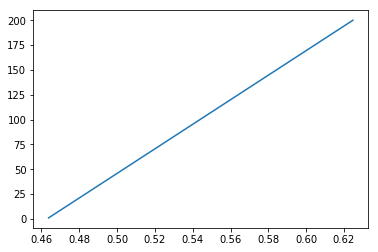

In [44]:
plt.plot(n_scores, n_range);

In [26]:
print("Increasing the number of estimators seems to increase the accuracy.")

Increasing the number of estimators seems to increase the accuracy.


Adjust Max Depth

Text(0,0.5,'Accuracy')

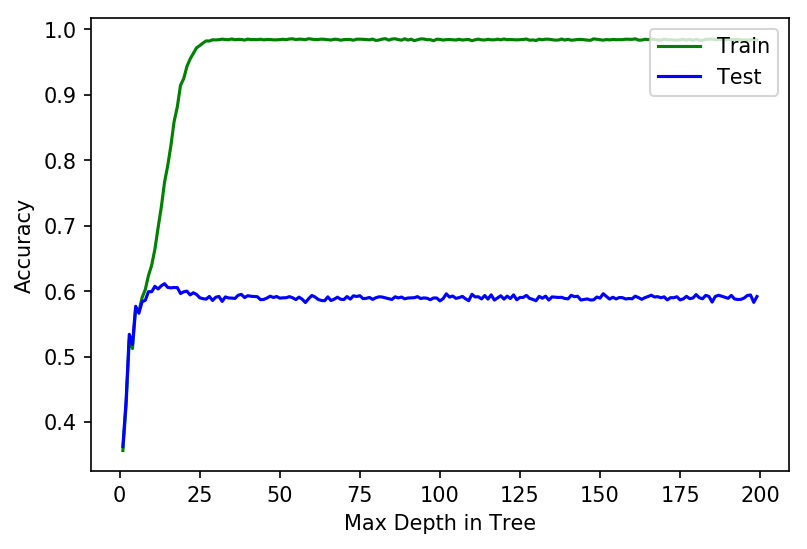

In [9]:
train_score = []
test_score = []

for depth in range(1,200):
    
    rf = RandomForestClassifier(max_depth = depth, n_jobs = 1)
    rf.fit(X_train, y_train)
    train_score.append(rf.score(X_train, y_train))
    test_score.append(rf.score(X_test, y_test))

plt.figure(dpi = 150)
plt.plot(range (1,200), train_score, 'g', label = 'Train')
plt.plot(range (1,200), test_score, 'b', label = 'Test')
plt.legend(loc = 'upper right')
plt.xlabel("Max Depth in Tree")
plt.ylabel ("Accuracy")

Text(0,0.5,'Accuracy')

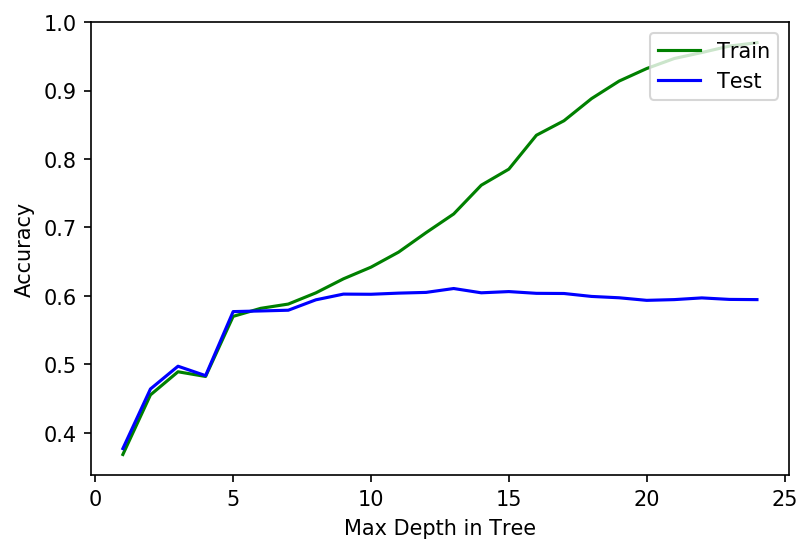

In [10]:
train_score = []
test_score = []

for depth in range(1,25):
    
    rf = RandomForestClassifier(max_depth = depth, n_jobs = 1)
    rf.fit(X_train, y_train)
    train_score.append(rf.score(X_train, y_train))
    test_score.append(rf.score(X_test, y_test))

plt.figure(dpi = 150)
plt.plot(range (1,25), train_score, 'g', label = 'Train')
plt.plot(range (1,25), test_score, 'b', label = 'Test')
plt.legend(loc = 'upper right')
plt.xlabel("Max Depth in Tree")
plt.ylabel ("Accuracy")

In [11]:
rf_model = RandomForestClassifier(max_depth = 10, random_state = 4444)
rf_model.fit(X_train, y_train)
rf_model.score(X_test, y_test)

0.6042908224076281

Adjust Criterion (Entropy)

In [12]:
rf_model = RandomForestClassifier(criterion = 'entropy', max_depth = 10, random_state = 4444)
rf_model.fit(X_train, y_train)
rf_model.score(X_test, y_test)

0.5980333730631704

In [65]:
print("Entry performs worse than gini impurity")

Entry performs worse than gini impurity


Final Random Forest Model

In [66]:
rf_model = RandomForestClassifier(max_depth = 10, n_estimators = 500, random_state = 4444)
rf_model.fit(X_train, y_train)
rf_model.score(X_test, y_test)

0.6122765196662694

In [81]:
style_list

['ipa',
 'lager',
 'stout',
 'porter',
 'saison',
 'kolsch',
 'ale',
 'apa',
 'wheat',
 'pilsner']

In [74]:
from sklearn.tree import export_graphviz

In [82]:
#This displays the first tree from my random forest

rf_data = tree.export_graphviz(rf_model[0], out_file = None,
                     feature_names = list(X.columns),
                     class_names = style_list,
                     filled=True, rounded=True,
                     special_characters=True)
rf_graph = graphviz.Source(rf_data)
rf_graph.view()

'Source.gv.pdf'